## Project: Finding the best markets to advertise in
A company is trying to find the best markest to advetise their product in.

A relevant data source is from [Free Code Camp](https://www.freecodecamp.org/news). It is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their [survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey) repository.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [282]:
fcc = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [283]:
fcc.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [89]:
cols = fcc.columns.tolist()

Data set contains 105 variables measuring answers from the responders, they contain amon others Age, Bootcamp assistance etc. Most of the questions are yes or no answer so this type of variables are categorical.

Let's see what are the interests of people by analysin the colum JobRoleInterest

In [284]:
interests = fcc.JobRoleInterest.value_counts(normalize = True)*100
interests.head()

Full-Stack Web Developer     11.770595
  Front-End Web Developer     6.435927
  Data Scientist              2.173913
Back-End Web Developer        2.030892
  Mobile Developer            1.673341
Name: JobRoleInterest, dtype: float64

11% People are interested on Full-Stack web developer,there are also people interested on more than one subject 2% are interested on Mobile development.

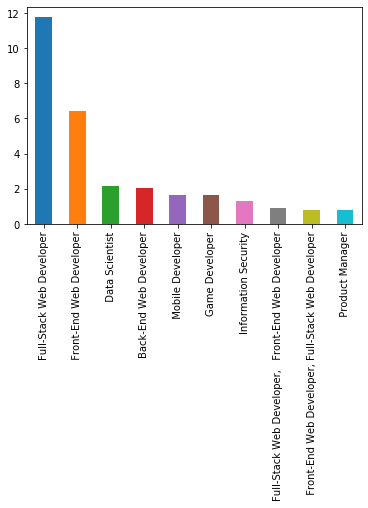

In [285]:
interests.head(10).plot.bar()
plt.show()

We found what are the primary interests of people, now for the purpose of the study we need to know the location of that potential market. We are interested in the location of the people who actually live in with the variable ContryLive.

For the analysis we are interested on the representative samples of the population, i.e the respondants who mark their interests not the ones who did not answered this item.

In [286]:
# population that responded to Job Roles
fccI= fcc[fcc.JobRoleInterest.notnull()]

In [287]:
fccI.CountryLive.value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [288]:
fccIf = pop.CountryLive.value_counts(normalize = True)
fccIf.head()

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

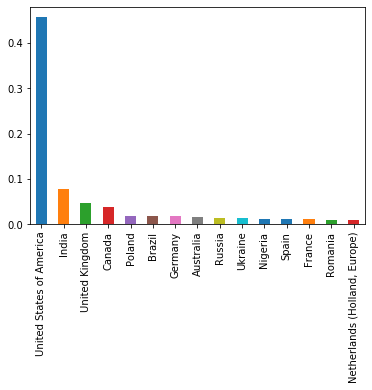

In [289]:
fccIf.head(15).plot.bar()
plt.show()

We now have a more clear view of the market location, mostly US then India, UK, Canada.

Now let's ask how much money are they willing to spend. The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

In [290]:
#The MoneyForLearning column contains the money spent
# Dividing the MoneyForLearning into MonthsPrograming to know how much per month willing to spend.
pd.options.mode.chained_assignment = None
#values that are cero to changed to 1
fccI.loc[fccI.MonthsProgramming == 0,"MonthsProgramming"] = 1
per_month= fccI.MoneyForLearning/fccI.MonthsProgramming
fccI["per_month"] = per_month

In [291]:
#Only data that contains not null values on money spent
fccI =fccI[fccI.per_month.notnull()]

In [292]:
#Only data that contains countrylive
fccI = fccI[fccI.CountryLive.notnull()]

In [315]:
# Only data with per_month non cero values
fccI = fccI[(fccI.per_month > 100) & (fccI.per_month < 6000)]

In [316]:
#Only data that contains countrylive
fccI = fccI[fccI.CountryLive.notnull()]

In [317]:
#how much money spent by month by country
spent= fccI.groupby("CountryLive").agg('mean')
spent.loc[countries,["per_month"]].sort_values('per_month', ascending = False)

In [318]:
#List of countries of our interest
countries = fccI.CountryLive.value_counts()[:4].index.tolist()

,per_month
CountryLive,
India,866.952659
United States of America,826.470525
Canada,816.537797
United Kingdom,417.097906


    On average, US has more spent on learning by month,then India and then Canada and lastly UK.

In [319]:
# Countries on the list and spent by month
count_month = fccI[fccI.CountryLive.isin(countries)].loc[:,["CountryLive","per_month"]]
count_month.head()

,CountryLive,per_month
2,United States of America,200.000000
22,United Kingdom,285.714286
68,United States of America,357.142857
97,United States of America,166.666667
234,United States of America,1200.000000


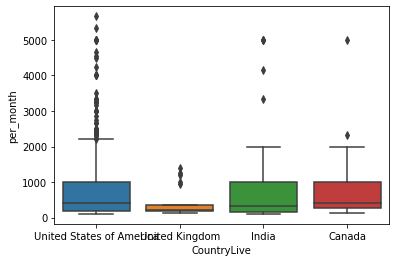

In [326]:
import seaborn as sns
sns.boxplot(y = 'per_month', x = 'CountryLive', data = count_month)
plt.show()

Based on the analysis the best country to advertise is US, the market is greater and also the average pay 